In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline 

In [2]:
abbreviations = pd.read_csv('./Data/abbr.csv', header=None)

data = None
validation = None
i = 1
for moa in abbreviations[1]:
    
    moa = moa.strip()
    data_file = './Data/' + moa + '_train.csv'
    validation_file = './Data/' + moa + '_test.csv'
    
    new_validation = pd.read_csv(validation_file, header=None).to_numpy()
    new_validation[:,0] = new_validation[:,0]*(i)
    
    new_data = pd.read_csv(data_file, header=None).to_numpy()
    new_data[:,0] = new_data[:,0]*i
    
    if data is not None:
        data = np.concatenate((data, new_data), axis=0)
    else:
        data = new_data
        
    if validation is not None:
        validation = np.concatenate((validation, new_validation), axis=0)
    else:
        validation = new_validation
        
    i += 1

In [3]:
print('train: ' + str(data.shape))
print('test: ' + str(validation.shape))

train: (26760, 8193)
test: (4440, 8193)


# Dataset Exploration

In [21]:
values, counts = np.unique(data[:,0], return_counts=True)

In [27]:
abbreviations[1]

0           cdk2
1     egfr_erbB1
2          gsk3b
3           hgfr
4     map_k_p38a
5        tpk_lck
6        tpk_src
7         vegfr2
Name: 1, dtype: object

Text(0, 0.5, 'Frequency')

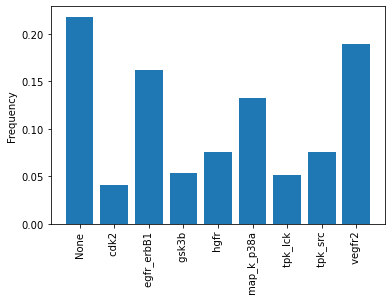

In [38]:
classes = ['None'] + [abbreviations[1][i] for i in list(range(8))]
plt.bar(classes, counts/data.shape[0])
plt.xticks(rotation=90)
plt.ylabel('Frequency')

In [40]:
# Split data into train and test
train_x, test_x, train_y, test_y = train_test_split(data[:,1:], data[:,0], test_size=0.2, stratify=data[:,0])

Text(0, 0.5, 'Frequency')

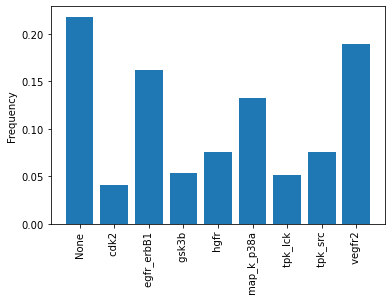

In [42]:
values, counts = np.unique(train_y, return_counts=True)

classes = ['None'] + [abbreviations[1][i] for i in list(range(8))]
plt.bar(classes, counts/train_x.shape[0])
plt.xticks(rotation=90)
plt.ylabel('Frequency')

In [9]:
# Create a function to save results
import json

def save_results(results, filename):
    with open(filename + '.json', 'w') as fp:
        json.dump(results, fp)
        
        
def load_results(file_name):
    with open(file_name) as f:
        temp_results = json.load(f)
    return temp_results

## Decision Trees

In [ ]:
### Create a function to fit and evaluate DT at given alphas
def evaluate_dtc(train_x, train_y, test_x, test_y, alphas, results):
    
    tested_alphas = [results[i][0] for i in list(results.keys())]
    
    i = len(list(results.keys()))
    
    for alpha in alphas:
        
        # Skip if alpha has already been tested
        if alpha in tested_alphas:
            continue
        
        # Initialize model
        model = DecisionTreeClassifier(ccp_alpha = alpha)
        
        # Fit model
        model = model.fit(train_x, train_y)
        
        # Evaluate performance
        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)
        
        # Save results
        results[i] = (alpha, train_accuracy, test_accuracy)
        
        # Update i
        i += 1
        
    return results

In [ ]:
### Evaluate model without any pruning
# Train model
model = DecisionTreeClassifier()
model = model.fit(train_x, train_y)

# Evaluate performance
train_accuracy = model.score(train_x, train_y)
test_accuracy = model.score(test_x, test_y)

print('Training accuracy: ' + str(train_accuracy))
print('Test accuracy: ' + str(test_accuracy))

In [ ]:
# Initialize model
model = DecisionTreeClassifier()

# Compute path for pruning
path = model.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
print('Max alpha: ' + str(np.max(ccp_alphas)))
print('Min alpha: ' + str(np.min(ccp_alphas)))

In [ ]:
### Run first search over alpha range
alpha_list = [0.01, 0.02, 0.03]
results_dtc = {}
results_dtc = evaluate_dtc(train_x, train_y, test_x, test_y, alpha_list, results_dtc)

In [ ]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1] for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2] for i in list(results_dtc.keys())]

plt.plot(alpha_list, train_acc_list)
plt.plot(alpha_list, test_acc_list)

In [ ]:
# Run second search over alpha range
alpha_list = [0.002, 0.004, 0.006, 0.008]
results_dtc = evaluate_dtc(train_x, train_y, test_x, test_y, alpha_list, results_dtc)

In [ ]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1] for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2] for i in list(results_dtc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.plot(alpha_list, train_acc_list)
plt.plot(alpha_list, test_acc_list)

In [ ]:
# Run second search over alpha range
alpha_list = [0.0002, 0.0004, 0.0006, 0.0008]
results_dtc = evaluate_dtc(train_x, train_y, test_x, test_y, alpha_list, results_dtc)

In [ ]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1] for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2] for i in list(results_dtc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.plot(alpha_list, train_acc_list)
plt.plot(alpha_list, test_acc_list)

In [ ]:
# Run second search over alpha range
alpha_list = [0.00002, 0.00004, 0.00006, 0.00008]
results_dtc = evaluate_dtc(train_x, train_y, test_x, test_y, alpha_list, results_dtc)

In [ ]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1] for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2] for i in list(results_dtc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.plot(alpha_list, train_acc_list)
plt.plot(alpha_list, test_acc_list)
plt.xlim((0,0.001))

In [ ]:
max_index = np.argmax(test_acc_list)

print('Optimized alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index]*100, 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index]*100, 2)) + '%')

In [ ]:
# Save decision tree results
save_results(results_dtc, 'results_dtc')

In [43]:
results_dtc = load_results('results_dtc.json')

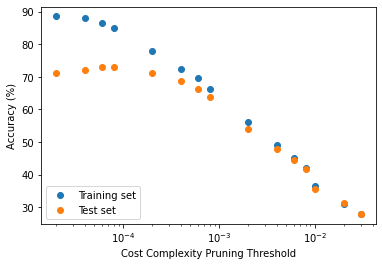

In [46]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1]*100 for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2]*100 for i in list(results_dtc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Cost Complexity Pruning Threshold')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

In [47]:
max_index = np.argmax(test_acc_list)

print('Optimized alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Optimized alpha: 6e-05
Training accuracy: 86.43%
Test accuracy: 72.98%


# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
### Create a function to fit and evaluate DT at given alphas
def evaluate_nn(train_x, train_y, test_x, test_y, hyperparameter_dic, resutls_nn):
    
    layers = hyperparameter_dic['layers']
    sizes = hyperparameter_dic['sizes']
    activations = hyperparameter_dic['activations']
    alphas = hyperparameter_dic['alphas']
    
    number_models = len(layers)*len(sizes)*len(activations)*len(alphas)
    i = len(list(resutls_nn.keys()))
    
    for number_layers in layers:
        for layer_size in sizes:
            for activation in activations:
                for alpha in alphas:
                    
                    for r_i in list(results_nn.keys()):
                        if alpha == results_nn[r_i][0]:
                            if layer_size == results_nn[r_i][4]:
                                if number_layers == results_nn[r_i][3]:
                                    if activation == results_nn[r_i][5]:
                                        continue
                        
                    print('Training model {} of {}...'.format(i+1, number_models))
                    
                    # Initialize model
                    model = MLPClassifier(
                        hidden_layer_sizes = [layer_size]*number_layers,
                        activation = activation,
                        alpha = alpha,
                        max_iter = 10000,
                        learning_rate = 'invscaling',
                        verbose = True
                    )
                                
                    # Fit model
                    model.fit(train_x, train_y)
                                
                    # Evaluate performance
                    train_accuracy = model.score(train_x, train_y)
                    test_accuracy = model.score(test_x, test_y)

                    # Save resutls_nn
                    resutls_nn[i] = (alpha, train_accuracy, test_accuracy, number_layers, layer_size, activation)

                    # Update i
                    i += 1

    return resutls_nn

In [ ]:
layers = [1, 2]
sizes = [8, 16]
activations = ['logistic', 'tanh']
alphas = [0.0001, 0.001]

hyperparameters_dic = {
    'layers': layers,
    'sizes': sizes,
    'activations': activations,
    'alphas': alphas
}

results_nn = {}

results_nn = evaluate_nn(train_x, train_y, test_x, test_y, hyperparameters_dic, results_nn)

In [ ]:
train_acc_list = [results_nn[i][1] for i in list(results_nn.keys())]
test_acc_list = [results_nn[i][2] for i in list(results_nn.keys())]
model_list = [results_nn[i][3] for i in list(results_nn.keys())]

max_index = np.argmax(test_acc_list)
print('Test accuracy: ' + str(test_acc_list[max_index]))
print('Train accuracy: ' + str(train_acc_list[max_index]))

In [ ]:
# Save current model progress
save_results(results_nn, 'results_nn')

In [ ]:
layers = [1, 2]
sizes = [32, 64, 128]
activations = ['logistic', 'tanh']
alphas = [0.0001, 0.001, 0.01]

hyperparameters_dic = {
    'layers': layers,
    'sizes': sizes,
    'activations': activations,
    'alphas': alphas
}

results_nn = {}

results_nn = evaluate_nn(train_x, train_y, test_x, test_y, hyperparameters_dic, results_nn)

In [ ]:
train_acc_list = [results_nn[i][1] for i in list(results_nn.keys())]
test_acc_list = [results_nn[i][2] for i in list(results_nn.keys())]
model_list = [results_nn[i][3] for i in list(results_nn.keys())]

max_index = np.argmax(test_acc_list)
print('Test accuracy: ' + str(test_acc_list[max_index]))
print('Train accuracy: ' + str(train_acc_list[max_index]))

In [ ]:
# Save current model progress
save_results(results_nn, 'results_nn')

In [48]:
results_nn = load_results('results_nn.json')

In [49]:
alpha_list = [results_nn[i][0] for i in list(results_nn.keys())]
train_acc_list = [results_nn[i][1]*100 for i in list(results_nn.keys())]
test_acc_list = [results_nn[i][2]*100 for i in list(results_nn.keys())]
number_layers_list = [results_nn[i][3] for i in list(results_nn.keys())]
layer_size_list = [results_nn[i][4] for i in list(results_nn.keys())]
activation_list = [results_nn[i][5] for i in list(results_nn.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

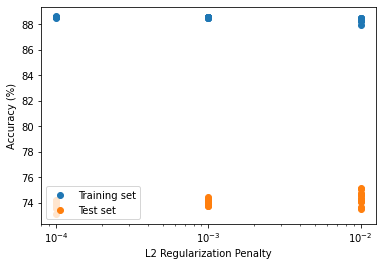

In [50]:
plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('L2 Regularization Penalty')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

Text(0, 0.5, 'Accuracy (%)')

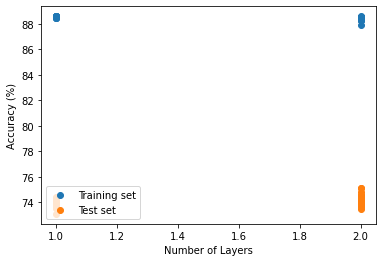

In [51]:
plt.scatter(number_layers_list, train_acc_list, label='Training set')
plt.scatter(number_layers_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

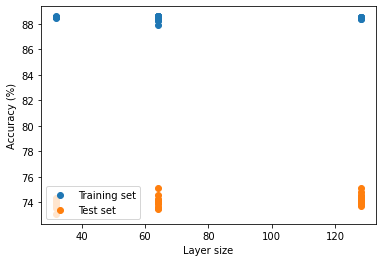

In [52]:
plt.scatter(layer_size_list, train_acc_list, label='Training set')
plt.scatter(layer_size_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Layer size')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

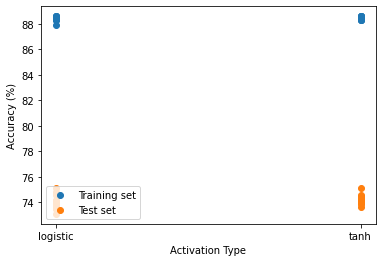

In [53]:
plt.scatter(activation_list, train_acc_list, label='Training set')
plt.scatter(activation_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Activation Type')
plt.ylabel('Accuracy (%)')

In [54]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Number of Layers: ' + str(number_layers_list[max_index]))
print('Layer Size: ' + str(layer_size_list[max_index]))
print('Activation type: ' + str(activation_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 0.01
Number of Layers: 2
Layer Size: 128
Activation type: logistic
Training accuracy: 88.45%
Test accuracy: 75.11%


# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def evaluate_knn(train_x, train_y, test_x, test_y, hyperparameters_dic, results_knn):
    
    neighbors_list = hyperparameters_dic['neighbors_list']
    weights_list = hyperparameters_dic['weights_list']
    
    i = len(list(results_knn.keys()))
    
    n_models = len(neighbors_list)*len(weights_list)
    
    for neighbors in neighbors_list:
        for weights in weights_list:
            
            print('Training model {} of {}...'.format(i+1, n_models))
            
            for r_i in list(results_knn.keys()):
                if neighbors == results_knn[r_i][0]:
                    if weights == results_knn[r_i][1]:
                        continue
            
            results_knn[i] = []
            
            model = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
            
            model.fit(train_x, train_y)
            
            train_accuracy = model.score(train_x, train_y)
            test_accuracy = model.score(test_x, test_y)
            
            results_knn[i].append(neighbors)
            results_knn[i].append(weights)
            results_knn[i].append(train_accuracy)
            results_knn[i].append(test_accuracy)
            
            i += 1
            
    return results_knn

In [ ]:
neighbors_list = [3, 5, 7]
weights_list = ['uniform', 'distance']

hyperparameter_dic = {'neighbors_list': neighbors_list, 'weights_list': weights_list}

results_knn = evaluate_knn(train_x, train_y, test_x, test_y, hyperparameter_dic, {})

In [ ]:
for key in results_knn.keys():
    print('Number nerighbors: ' + str(results_knn[key][0]))
    print('Weighting: ' + str(results_knn[key][1]))
    print('Training accuracy: ' + str(results_knn[key][2]))
    print('Test accuracy: ' + str(results_knn[key][3]))
    print()

In [ ]:
save_results(results_knn, 'results_knn')

In [63]:
results_knn = load_results('results_knn.json')

In [64]:
neighbors_list = [results_knn[i][0] for i in list(results_knn.keys())]
weights_list = [results_knn[i][1] for i in list(results_knn.keys())]
train_acc_list = [results_knn[i][2]*100 for i in list(results_knn.keys())]
test_acc_list = [results_knn[i][3]*100 for i in list(results_knn.keys())]

neighboars_list, train_acc_list, test_acc_list, weights_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list, weights_list)))

Text(0, 0.5, 'Accuracy (%)')

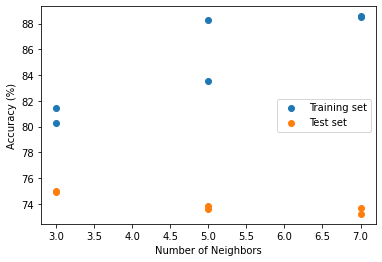

In [68]:
plt.scatter(neighbors_list, train_acc_list, label='Training set')
plt.scatter(neighbors_list, test_acc_list, label='Test set')
plt.legend(loc='center right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

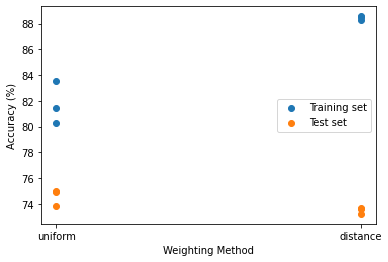

In [69]:
plt.scatter(weights_list, train_acc_list, label='Training set')
plt.scatter(weights_list, test_acc_list, label='Test set')
plt.legend(loc='center right')
plt.xlabel('Weighting Method')
plt.ylabel('Accuracy (%)')

In [71]:
max_index = np.argmax(test_acc_list)

print('Number of Neighbors: ' + str(neighbors_list[max_index]))
print('Weighting Methond: ' + str(weights_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Number of Neighbors: 3
Weighting Methond: uniform
Training accuracy: 81.48%
Test accuracy: 75.02%


# Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def evaluate_gbc(train_x, train_y, test_x, test_y, hyperparameters_dic, results_gbc):
    
    alphas = hyperparameters_dic['alphas']
    
    i = len(list(results_gbc.keys()))
    
    n_models = len(alphas)
    
    for alpha in alphas:
            
        print('Training model {} of {}...'.format(i+1, n_models))

        if alpha in [results_gbc[i][0] for i in list(results_gbc.keys())]:
            continue
            
        results_gbc[i] = []

        model = GradientBoostingClassifier(ccp_alpha = alpha)

        model.fit(train_x, train_y)

        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)

        results_gbc[i].append(alpha)
        results_gbc[i].append(train_accuracy)
        results_gbc[i].append(test_accuracy)

        i += 1
            
    return results_gbc

In [ ]:
alphas = [0.01, 0.001, 0.0001, 0]

hyperparameters_dic = {'alphas': alphas}

results_gbc = evaluate_gbc(train_x, train_y, test_x, test_y, hyperparameters_dic, {})

In [ ]:
for key in results_gbc.keys():
    print('Alphas: ' + str(results_gbc[key][0]))
    print('Training accuracy: ' + str(results_gbc[key][1]))
    print('Test accuracy: ' + str(results_gbc[key][2]))
    print()

In [ ]:
save_results(results_gbc, 'results_gbc')

In [74]:
results_gbc = load_results('results_gbc.json')

In [89]:
alpha_list = [results_gbc[i][0] for i in list(results_gbc.keys())]
train_acc_list = [results_gbc[i][1]*100 for i in list(results_gbc.keys())]
test_acc_list = [results_gbc[i][2]*100 for i in list(results_gbc.keys())]

Text(0, 0.5, 'Accuracy (%)')

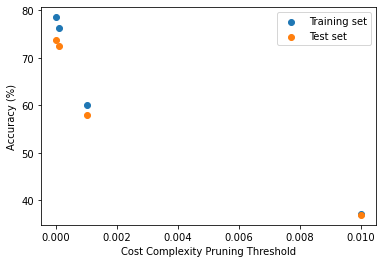

In [90]:
alpha_list = [results_gbc[i][0] for i in list(results_gbc.keys())]
train_acc_list = [results_gbc[i][1]*100 for i in list(results_gbc.keys())]
test_acc_list = [results_gbc[i][2]*100 for i in list(results_gbc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='upper right')
plt.xlabel('Cost Complexity Pruning Threshold')
plt.ylabel('Accuracy (%)')
#plt.xscale('log')

In [92]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 0
Training accuracy: 78.56%
Test accuracy: 73.67%


# Support Vector Machine

In [14]:
from sklearn.svm import SVC

In [15]:
def evaluate_svm(train_x, train_y, test_x, test_y, hyperparameters_dic, results_svm):
    
    alphas = hyperparameters_dic['alphas']
    
    i = len(list(results_svm.keys()))
    
    n_models = len(alphas)
    
    for alpha in alphas:
            
        print('Training model {} of {}...'.format(i+1, n_models))

        if alpha in [results_svm[i][0] for i in list(results_svm.keys())]:
            continue
            
        results_svm[i] = []

        model = SVC(C = alpha)

        model.fit(train_x, train_y)

        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)

        results_svm[i].append(alpha)
        results_svm[i].append(train_accuracy)
        results_svm[i].append(test_accuracy)

        i += 1
            
    return results_svm

In [ ]:
alphas = [0.1, 0.01, 0.001, 0.0001]

hyperparameters_dic = {'alphas': alphas}

results_svm = evaluate_svm(train_x, train_y, test_x, test_y, hyperparameters_dic, {})

In [ ]:
for key in results_svm.keys():
    print('Alphas: ' + str(results_svm[key][0]))
    print('Training accuracy: ' + str(results_svm[key][1]))
    print('Test accuracy: ' + str(results_svm[key][2]))
    print()

In [ ]:
save_results(results_svm, 'results_svm')

In [16]:
alphas = [1, 10, 100]

hyperparameters_dic = {'alphas': alphas}
results_svm = load_results('./results_svm.json')

results_svm = evaluate_svm(train_x, train_y, test_x, test_y, hyperparameters_dic, results_svm)

Training model 5 of 3...
Training model 6 of 3...
Training model 7 of 3...


In [17]:
results_svm

{'0': [0.1, 0.546945067264574, 0.539050822122571],
 '1': [0.01, 0.26046337817638265, 0.2619581464872945],
 '2': [0.001, 0.21814275037369207, 0.21804932735426008],
 '3': [0.0001, 0.21814275037369207, 0.21804932735426008],
 4: [1, 0.7670497010463379, 0.742152466367713],
 5: [10, 0.8557548579970105, 0.7750373692077728],
 6: [100, 0.8843423019431988, 0.750560538116592]}

In [18]:
save_results(results_svm, 'results_svm')

In [93]:
results_svm = load_results('results_svm.json')

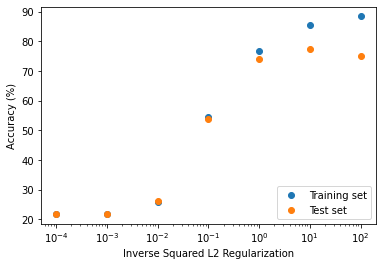

In [96]:
alpha_list = [results_svm[i][0] for i in list(results_svm.keys())]
train_acc_list = [results_svm[i][1]*100 for i in list(results_svm.keys())]
test_acc_list = [results_svm[i][2]*100 for i in list(results_svm.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower right')
plt.xlabel('Inverse Squared L2 Regularization')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

In [95]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 10
Training accuracy: 85.58%
Test accuracy: 77.5%
